In [95]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

## Get data

In [96]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

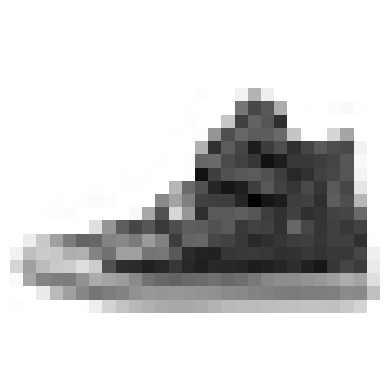

In [97]:
plt.imshow(X_train[142], cmap="binary")
plt.axis('off')
plt.show()

## List of categories

In [98]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka", "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

# Keras Sequential

In [99]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
print(y_train.shape)
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)


(60000,)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 300)               235500    
                                                                 
 dense_43 (Dense)            (None, 100)               30100     
                                                                 
 dense_44 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Crossentropy

In [100]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


## Callback Tensorboard

In [101]:
logdir = os.path.join(os.curdir, "image_logs")

tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

# Train the model
history = model.fit(X_train, y_train, epochs=20, 
                    validation_split=0.1,
                    validation_data=(X_test, y_test), 
                    callbacks=[tensorboard_cb])


Epoch 1/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.7109 - accuracy: 0.7678 - val_loss: 0.5309 - val_accuracy: 0.8213
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4852 - accuracy: 0.8324 - val_loss: 0.5071 - val_accuracy: 0.8244
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4407 - accuracy: 0.8473 - val_loss: 0.4732 - val_accuracy: 0.8354
Epoch 4/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4158 - accuracy: 0.8549 - val_loss: 0.4334 - val_accuracy: 0.8491
Epoch 5/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3947 - accuracy: 0.8611 - val_loss: 0.4486 - val_accuracy: 0.8420
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3796 - accuracy: 0.8664 - val_loss: 0.4040 - val_accuracy: 0.8583
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3665 - accuracy: 0.8707 - val_loss: 0.3975 - 

1/1 [==============================] - 0s 49ms/step
Prediction: sukienka
Confidence: 0.5099353
Truth: spodnie


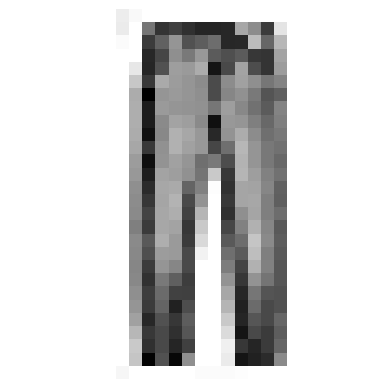

In [102]:
# Show pictures
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [103]:
# Save Tensorflow model
model.save("fashion_clf.h5")

# Test
print("Test loss:", model.evaluate(X_test, y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.3345 - accuracy: 0.8823
Test loss: [0.3344516158103943, 0.8823000192642212]


# Regression

In [104]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
housing = fetch_california_housing(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(housing["data"], housing["target"], test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.5, random_state=1) # 60% train and 20% validation

## Scaler


In [106]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## 1st model

In [107]:
model_housing_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_housing_1.compile(loss="mean_squared_error", optimizer="sgd")


Early stopping

In [108]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

Callback Tensorboard

In [109]:
logdir = os.path.join(os.curdir, "housing_logs")

tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

# Train the model
history = model_housing_1.fit(X_train, y_train, epochs=30,
                            validation_data=(X_valid, y_valid), 
                            callbacks=[early_stopping_cb, tensorboard_cb])


Epoch 1/30


258/258 [==============================] - 2s 6ms/step - loss: 1.0579 - val_loss: 0.6292
Epoch 2/30
258/258 [==============================] - 2s 6ms/step - loss: 0.5340 - val_loss: 0.5257
Epoch 3/30
258/258 [==============================] - 1s 4ms/step - loss: 0.4884 - val_loss: 0.4854
Epoch 4/30
258/258 [==============================] - 1s 4ms/step - loss: 0.4498 - val_loss: 0.4650
Epoch 5/30
258/258 [==============================] - 2s 7ms/step - loss: 0.4301 - val_loss: 0.4528
Epoch 6/30
258/258 [==============================] - 1s 6ms/step - loss: 0.4525 - val_loss: 0.4541
Epoch 7/30
258/258 [==============================] - 1s 5ms/step - loss: 0.4184 - val_loss: 0.4454
Epoch 8/30
258/258 [==============================] - 1s 4ms/step - loss: 0.4140 - val_loss: 0.4331
Epoch 9/30
258/258 [==============================] - 2s 8ms/step - loss: 0.4056 - val_loss: 0.4556
Epoch 10/30
258/258 [==============================] - 1s 4ms/step - loss: 0.4094 - val_loss: 0.4203
Epoch 11/3

In [110]:
# Save model
model_housing_1.save("reg_housing_1.h5")

# Test the model
mse_test = model_housing_1.evaluate(X_test, y_test)
print("MSE:", mse_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.4080
MSE: 0.4080103039741516


## 2nd model

In [111]:
model_housing_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(1)
])
model_housing_2.compile(loss="mean_squared_error", optimizer="sgd")

# Train the model
history = model_housing_2.fit(X_train, y_train, epochs=30,
                            validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping_cb, tensorboard_cb])

# Save model
model_housing_2.save("reg_housing_2.h5")

# Test the accuracy
mse_test = model_housing_2.evaluate(X_test, y_test)
print("MSE:", mse_test)

Epoch 1/30
258/258 [==============================] - 2s 6ms/step - loss: 0.9452 - val_loss: 0.5411
Epoch 2/30
258/258 [==============================] - 2s 6ms/step - loss: 0.4807 - val_loss: 0.4650
Epoch 3/30
258/258 [==============================] - 1s 5ms/step - loss: 0.4216 - val_loss: 0.4381
Epoch 4/30
258/258 [==============================] - 1s 6ms/step - loss: 0.3936 - val_loss: 0.4063
Epoch 5/30
258/258 [==============================] - 3s 10ms/step - loss: 0.3782 - val_loss: 0.4123
Epoch 6/30
258/258 [==============================] - 1s 6ms/step - loss: 0.3687 - val_loss: 0.3968
Epoch 7/30
258/258 [==============================] - 2s 6ms/step - loss: 0.3630 - val_loss: 0.3861
Epoch 8/30
258/258 [==============================] - 1s 5ms/step - loss: 0.3551 - val_loss: 0.3842
Epoch 9/30
258/258 [==============================] - 1s 5ms/step - loss: 0.3502 - val_loss: 0.3869
Epoch 10/30
258/258 [==============================] - 1s 5ms/step - loss: 0.3444 - val_loss: 0.377

## 3rd model

In [112]:
model_housing_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])
model_housing_3.compile(loss="mean_squared_error", optimizer="sgd")

# Train the model
history = model_housing_3.fit(X_train, y_train, epochs=30,
                            validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping_cb, tensorboard_cb])

# Save model
model_housing_3.save("reg_housing_3.h5")

# Test the accuracy
mse_test = model_housing_3.evaluate(X_test, y_test)
print("MSE:", mse_test)


Epoch 1/30
258/258 [==============================] - 2s 6ms/step - loss: 0.8888 - val_loss: 0.5795
Epoch 2/30
258/258 [==============================] - 2s 6ms/step - loss: 0.5083 - val_loss: 0.4895
Epoch 3/30
258/258 [==============================] - 2s 6ms/step - loss: 0.4343 - val_loss: 0.4631
Epoch 4/30
258/258 [==============================] - 2s 8ms/step - loss: 0.4040 - val_loss: 0.4272
Epoch 5/30
258/258 [==============================] - 1s 4ms/step - loss: 0.3823 - val_loss: 0.3991
Epoch 6/30
258/258 [==============================] - 1s 5ms/step - loss: 0.3708 - val_loss: 0.3890
Epoch 7/30
258/258 [==============================] - 2s 7ms/step - loss: 0.3591 - val_loss: 0.3836
Epoch 8/30
258/258 [==============================] - 1s 5ms/step - loss: 0.3529 - val_loss: 0.3735
Epoch 9/30
258/258 [==============================] - 1s 5ms/step - loss: 0.3471 - val_loss: 0.3872
Epoch 10/30
258/258 [==============================] - 2s 7ms/step - loss: 0.3437 - val_loss: 0.3692